# Hypergeometric Functions: Theory and Computation

## Introduction

Hypergeometric functions form one of the most important classes of special functions in mathematical physics and applied mathematics. They arise naturally in the solutions of second-order linear differential equations with three regular singular points and encompass a vast array of classical functions as special cases.

## Historical Context

The study of hypergeometric functions began with Euler and Gauss in the 18th and 19th centuries. Gauss's systematic study of the series that now bears his name laid the foundation for much of modern special function theory.

## The Gaussian Hypergeometric Function

### Definition

The **Gaussian hypergeometric function** $_2F_1(a, b; c; z)$ is defined by the power series:

$$_2F_1(a, b; c; z) = \sum_{n=0}^{\infty} \frac{(a)_n (b)_n}{(c)_n} \frac{z^n}{n!}$$

where $(q)_n$ denotes the **Pochhammer symbol** (rising factorial):

$$(q)_n = q(q+1)(q+2)\cdots(q+n-1) = \frac{\Gamma(q+n)}{\Gamma(q)}$$

with $(q)_0 = 1$.

### Convergence

The series converges absolutely for $|z| < 1$. At $z = 1$, the series converges if $\text{Re}(c - a - b) > 0$.

### Hypergeometric Differential Equation

The function $_2F_1(a, b; c; z)$ satisfies the **hypergeometric differential equation**:

$$z(1-z)\frac{d^2w}{dz^2} + [c - (a+b+1)z]\frac{dw}{dz} - ab\,w = 0$$

This is a second-order linear ODE with three regular singular points at $z = 0, 1, \infty$.

## Special Cases

Many elementary and special functions can be expressed as hypergeometric functions:

| Function | Hypergeometric Form |
|----------|--------------------|
| $(1-z)^{-a}$ | $_2F_1(a, b; b; z)$ |
| $\ln(1+z)$ | $z \cdot {}_2F_1(1, 1; 2; -z)$ |
| $\arcsin(z)$ | $z \cdot {}_2F_1(\frac{1}{2}, \frac{1}{2}; \frac{3}{2}; z^2)$ |
| Legendre $P_n(z)$ | $_2F_1(-n, n+1; 1; \frac{1-z}{2})$ |

## Generalized Hypergeometric Functions

The notation extends to **generalized hypergeometric functions** $_pF_q$:

$$_pF_q(a_1, \ldots, a_p; b_1, \ldots, b_q; z) = \sum_{n=0}^{\infty} \frac{(a_1)_n \cdots (a_p)_n}{(b_1)_n \cdots (b_q)_n} \frac{z^n}{n!}$$

### Convergence Criteria for $_pF_q$

- If $p \leq q$: converges for all finite $z$
- If $p = q + 1$: converges for $|z| < 1$
- If $p > q + 1$: diverges for all $z \neq 0$ (unless series terminates)

## Integral Representations

The Gaussian hypergeometric function admits the **Euler integral representation**:

$$_2F_1(a, b; c; z) = \frac{\Gamma(c)}{\Gamma(b)\Gamma(c-b)} \int_0^1 t^{b-1}(1-t)^{c-b-1}(1-zt)^{-a}\,dt$$

valid for $\text{Re}(c) > \text{Re}(b) > 0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy.special import gamma, hyp2f1

# Set up plotting style
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['lines.linewidth'] = 2

## Implementation: Computing Hypergeometric Functions

We'll implement direct computation using the series definition and compare with SciPy's optimized implementation.

In [2]:
def pochhammer(q, n):
    """
    Compute the Pochhammer symbol (rising factorial).
    
    (q)_n = q(q+1)(q+2)...(q+n-1) = Gamma(q+n)/Gamma(q)
    
    Parameters
    ----------
    q : float
        Base value
    n : int
        Number of terms in the product
        
    Returns
    -------
    float
        The Pochhammer symbol (q)_n
    """
    if n == 0:
        return 1.0
    if n < 0:
        raise ValueError("n must be non-negative")
    
    result = 1.0
    for k in range(n):
        result *= (q + k)
    return result


def hyp2f1_series(a, b, c, z, max_terms=100, tol=1e-15):
    """
    Compute 2F1(a, b; c; z) using the series definition.
    
    Parameters
    ----------
    a, b, c : float
        Parameters of the hypergeometric function
    z : float or array-like
        Argument (must satisfy |z| < 1 for convergence)
    max_terms : int
        Maximum number of terms in the series
    tol : float
        Convergence tolerance
        
    Returns
    -------
    float or ndarray
        Value of 2F1(a, b; c; z)
    """
    z = np.asarray(z)
    scalar_input = z.ndim == 0
    z = np.atleast_1d(z)
    
    result = np.ones_like(z, dtype=np.float64)
    term = np.ones_like(z, dtype=np.float64)
    
    for n in range(1, max_terms):
        # Compute term ratio: ((a+n-1)(b+n-1)z) / ((c+n-1)n)
        term = term * ((a + n - 1) * (b + n - 1) / ((c + n - 1) * n)) * z
        result = result + term
        
        # Check convergence
        if np.all(np.abs(term) < tol * np.abs(result)):
            break
    
    if scalar_input:
        return float(result[0])
    return result


# Test our implementation against SciPy
print("Verification: Comparing series implementation with SciPy")
print("=" * 55)

test_cases = [
    (1, 1, 2, 0.5),
    (0.5, 0.5, 1.5, 0.3),
    (2, 3, 5, 0.4),
    (-2, 1, 1, 0.5),  # Terminating series
]

for a, b, c, z in test_cases:
    our_result = hyp2f1_series(a, b, c, z)
    scipy_result = hyp2f1(a, b, c, z)
    rel_error = abs(our_result - scipy_result) / abs(scipy_result)
    print(f"2F1({a}, {b}; {c}; {z})")
    print(f"  Series: {our_result:.10f}")
    print(f"  SciPy:  {scipy_result:.10f}")
    print(f"  Rel. Error: {rel_error:.2e}\n")

Verification: Comparing series implementation with SciPy
2F1(1, 1; 2; 0.5)
  Series: 1.3862943611
  SciPy:  1.3862943611
  Rel. Error: 8.01e-16

2F1(0.5, 0.5; 1.5; 0.3)
  Series: 1.0582725367
  SciPy:  1.0582725367
  Rel. Error: 2.10e-16

2F1(2, 3; 5; 0.4)
  Series: 1.7889245087
  SciPy:  1.7889245087
  Rel. Error: 4.96e-16

2F1(-2, 1; 1; 0.5)
  Series: 0.2500000000
  SciPy:  0.2500000000
  Rel. Error: 0.00e+00



## Visualization: Hypergeometric Functions

Let's visualize the behavior of $_2F_1$ for various parameter choices.

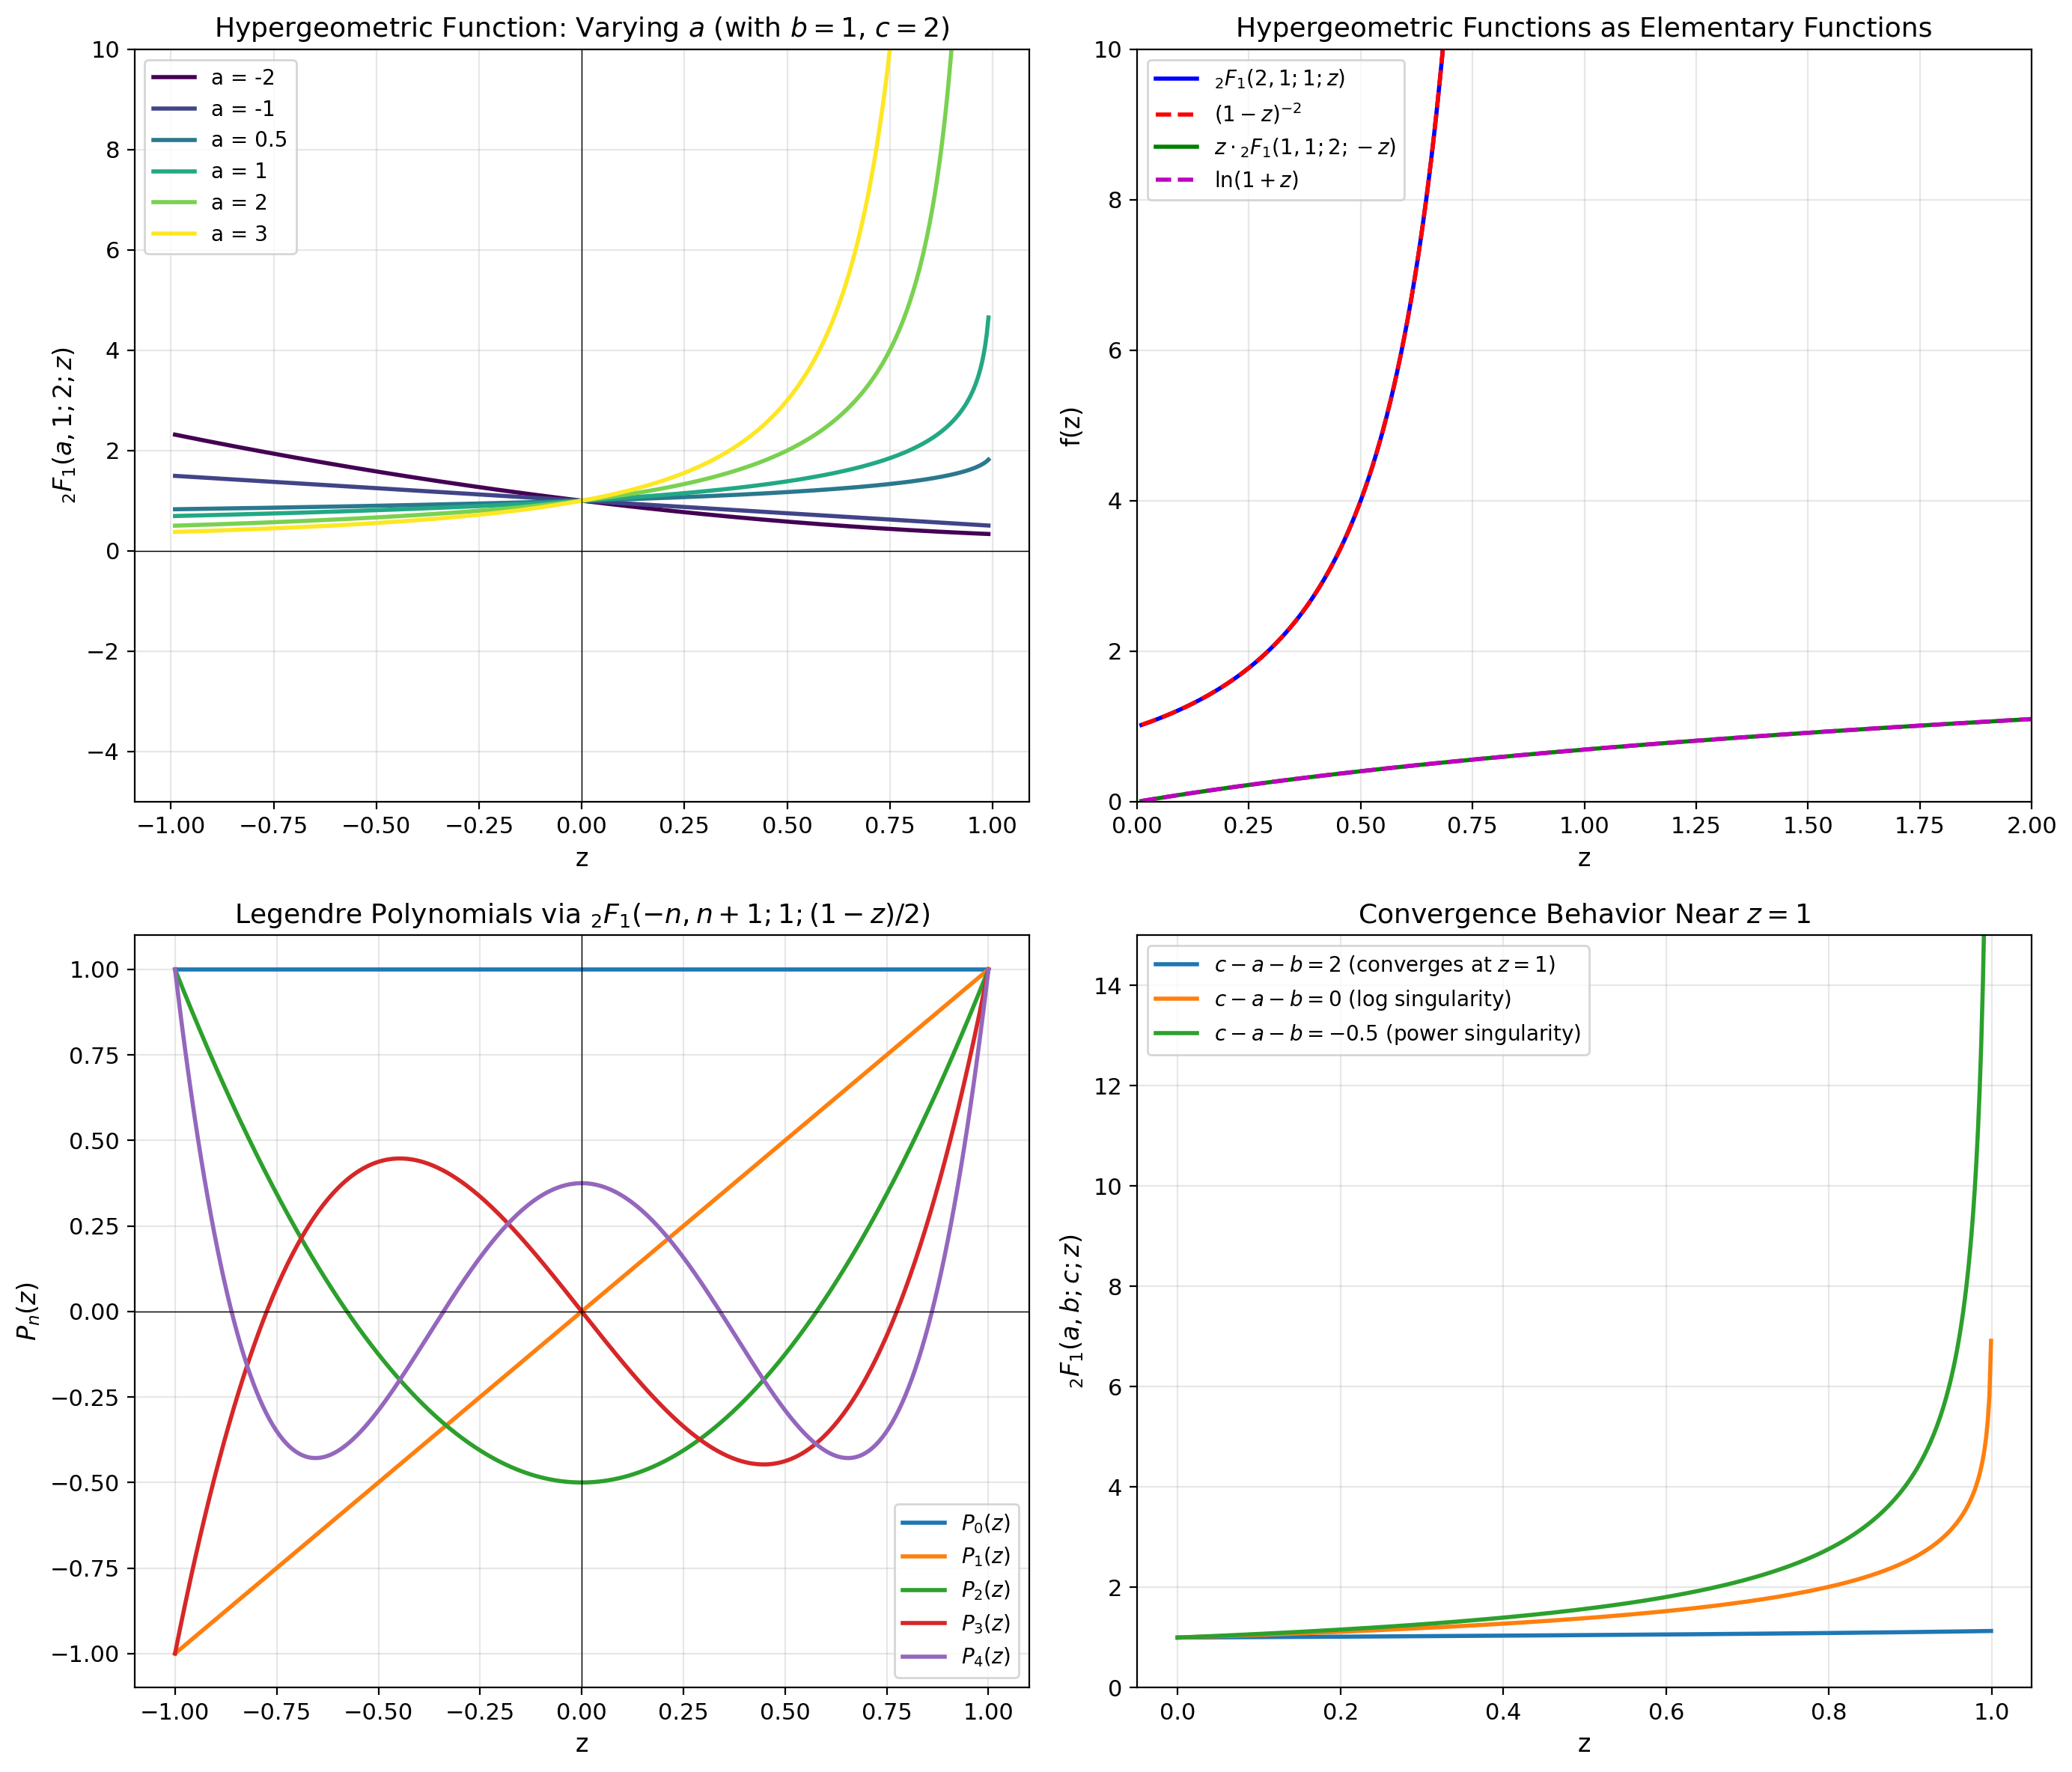

Plot saved to 'plot.png'


In [3]:
# Create a comprehensive figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# ============================================================
# Plot 1: 2F1 for different values of parameter 'a'
# ============================================================
ax1 = axes[0, 0]
z = np.linspace(-0.99, 0.99, 500)
a_values = [-2, -1, 0.5, 1, 2, 3]
colors = plt.cm.viridis(np.linspace(0, 1, len(a_values)))

for a, color in zip(a_values, colors):
    y = np.array([hyp2f1(a, 1, 2, zi) for zi in z])
    ax1.plot(z, y, label=f'a = {a}', color=color)

ax1.set_xlabel('z')
ax1.set_ylabel(r'$_2F_1(a, 1; 2; z)$')
ax1.set_title(r'Hypergeometric Function: Varying $a$ (with $b=1$, $c=2$)')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-5, 10)
ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax1.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

# ============================================================
# Plot 2: Special case - Relation to elementary functions
# ============================================================
ax2 = axes[0, 1]
z = np.linspace(0.01, 0.99, 500)

# (1-z)^(-a) = 2F1(a, b; b; z)
a_val = 2
hyp_binomial = np.array([hyp2f1(a_val, 1, 1, zi) for zi in z])
exact_binomial = (1 - z) ** (-a_val)

ax2.plot(z, hyp_binomial, 'b-', label=r'$_2F_1(2, 1; 1; z)$', linewidth=2)
ax2.plot(z, exact_binomial, 'r--', label=r'$(1-z)^{-2}$', linewidth=2)

# ln(1+z) = z * 2F1(1, 1; 2; -z)
z_ln = np.linspace(0.01, 2, 500)
hyp_log = z_ln * np.array([hyp2f1(1, 1, 2, -zi) for zi in z_ln])
exact_log = np.log(1 + z_ln)

ax2.plot(z_ln, hyp_log, 'g-', label=r'$z \cdot {}_2F_1(1, 1; 2; -z)$', linewidth=2)
ax2.plot(z_ln, exact_log, 'm--', label=r'$\ln(1+z)$', linewidth=2)

ax2.set_xlabel('z')
ax2.set_ylabel('f(z)')
ax2.set_title('Hypergeometric Functions as Elementary Functions')
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 2)
ax2.set_ylim(0, 10)

# ============================================================
# Plot 3: Terminating hypergeometric series (polynomials)
# ============================================================
ax3 = axes[1, 0]
z = np.linspace(-1, 1, 500)

# When a = -n (negative integer), the series terminates
# These give orthogonal polynomials in many cases
for n in range(5):
    # Legendre polynomials: P_n(z) = 2F1(-n, n+1; 1; (1-z)/2)
    y = np.array([hyp2f1(-n, n+1, 1, (1-zi)/2) for zi in z])
    ax3.plot(z, y, label=f'$P_{n}(z)$', linewidth=2)

ax3.set_xlabel('z')
ax3.set_ylabel(r'$P_n(z)$')
ax3.set_title(r'Legendre Polynomials via $_2F_1(-n, n+1; 1; (1-z)/2)$')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax3.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

# ============================================================
# Plot 4: Convergence behavior near z = 1
# ============================================================
ax4 = axes[1, 1]
z = np.linspace(0, 0.999, 500)

# Different behaviors based on Re(c - a - b)
params = [
    (0.5, 0.5, 3, r'$c - a - b = 2$ (converges at $z=1$)'),      # c - a - b = 2 > 0
    (1, 1, 2, r'$c - a - b = 0$ (log singularity)'),              # c - a - b = 0
    (1, 1, 1.5, r'$c - a - b = -0.5$ (power singularity)'),       # c - a - b = -0.5 < 0
]

for a, b, c, label in params:
    y = np.array([hyp2f1(a, b, c, zi) for zi in z])
    ax4.plot(z, y, label=label, linewidth=2)

ax4.set_xlabel('z')
ax4.set_ylabel(r'$_2F_1(a, b; c; z)$')
ax4.set_title(r'Convergence Behavior Near $z = 1$')
ax4.legend(loc='upper left')
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 15)

plt.tight_layout()
plt.savefig('hypergeometric_functions_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved to 'plot.png'")

## Generalized Hypergeometric Functions: $_pF_q$

Let's explore the more general $_pF_q$ functions.

In [4]:
def hyp_pFq_series(a_params, b_params, z, max_terms=100, tol=1e-15):
    """
    Compute the generalized hypergeometric function pFq.
    
    Parameters
    ----------
    a_params : list of float
        Numerator parameters (a_1, ..., a_p)
    b_params : list of float
        Denominator parameters (b_1, ..., b_q)
    z : float
        Argument
    max_terms : int
        Maximum number of terms
    tol : float
        Convergence tolerance
        
    Returns
    -------
    float
        Value of pFq(a; b; z)
    """
    result = 1.0
    term = 1.0
    
    for n in range(1, max_terms):
        # Compute the ratio term_{n} / term_{n-1}
        num = 1.0
        for a in a_params:
            num *= (a + n - 1)
        
        den = n  # factorial contribution
        for b in b_params:
            den *= (b + n - 1)
        
        term = term * num / den * z
        result += term
        
        if abs(term) < tol * abs(result):
            break
    
    return result


# Examples of generalized hypergeometric functions
print("Generalized Hypergeometric Functions: Examples")
print("=" * 50)

# 0F1 - Related to Bessel functions
# 0F1(; c; z) = sum_{n=0}^inf z^n / ((c)_n n!)
# Connection: 0F1(; 1; -z^2/4) = J_0(z)
z_val = 1.0
result_0F1 = hyp_pFq_series([], [1], -z_val**2/4)
bessel_J0 = special.jv(0, z_val)
print(f"0F1(; 1; -{z_val}²/4) = {result_0F1:.10f}")
print(f"J_0({z_val}) = {bessel_J0:.10f}")
print(f"Relative error: {abs(result_0F1 - bessel_J0)/abs(bessel_J0):.2e}\n")

# 1F1 (Kummer's confluent hypergeometric function)
# 1F1(a; c; z) - arises in quantum mechanics
a, c, z_val = 1, 2, 1.0
result_1F1 = hyp_pFq_series([a], [c], z_val)
scipy_1F1 = special.hyp1f1(a, c, z_val)
print(f"1F1({a}; {c}; {z_val}) = {result_1F1:.10f}")
print(f"SciPy hyp1f1:    {scipy_1F1:.10f}")
print(f"Relative error: {abs(result_1F1 - scipy_1F1)/abs(scipy_1F1):.2e}\n")

# 2F1 verification using our pFq implementation
a, b, c, z_val = 0.5, 1.5, 2, 0.3
result_2F1_general = hyp_pFq_series([a, b], [c], z_val)
scipy_2F1 = hyp2f1(a, b, c, z_val)
print(f"2F1({a}, {b}; {c}; {z_val}) = {result_2F1_general:.10f}")
print(f"SciPy hyp2f1:        {scipy_2F1:.10f}")
print(f"Relative error: {abs(result_2F1_general - scipy_2F1)/abs(scipy_2F1):.2e}")

Generalized Hypergeometric Functions: Examples
0F1(; 1; -1.0²/4) = 0.7651976866
J_0(1.0) = 0.7651976866
Relative error: 0.00e+00

1F1(1; 2; 1.0) = 1.7182818285
SciPy hyp1f1:    1.7182818285
Relative error: 2.58e-16

2F1(0.5, 1.5; 2; 0.3) = 1.1396613687
SciPy hyp2f1:        1.1396613687
Relative error: 1.95e-16


## Contiguous Relations

One of the most powerful properties of hypergeometric functions is their **contiguous relations**. A function is contiguous to $_2F_1(a, b; c; z)$ if one of its parameters differs by $\pm 1$.

### Gauss's Contiguous Relations

There exist 15 contiguous relations connecting $_2F_1(a, b; c; z)$ with its six contiguous functions. A fundamental example:

$$(c - a - b) \, _2F_1(a, b; c; z) + a(1-z) \, _2F_1(a+1, b; c; z) - (c-b) \, _2F_1(a, b-1; c; z) = 0$$

In [5]:
def verify_contiguous_relation(a, b, c, z):
    """
    Verify the contiguous relation:
    (c-a-b)*F(a,b;c;z) + a*(1-z)*F(a+1,b;c;z) - (c-b)*F(a,b-1;c;z) = 0
    """
    F_ab = hyp2f1(a, b, c, z)
    F_a1b = hyp2f1(a+1, b, c, z)
    F_ab1 = hyp2f1(a, b-1, c, z)
    
    lhs = (c - a - b) * F_ab + a * (1 - z) * F_a1b - (c - b) * F_ab1
    return lhs


print("Verification of Contiguous Relation")
print("(c-a-b)·F(a,b;c;z) + a(1-z)·F(a+1,b;c;z) - (c-b)·F(a,b-1;c;z) = 0")
print("=" * 65)

test_params = [
    (1, 2, 3, 0.5),
    (0.5, 1.5, 2.5, 0.3),
    (2, 3, 5, 0.7),
    (1.1, 2.2, 4.4, 0.4),
]

for a, b, c, z in test_params:
    residual = verify_contiguous_relation(a, b, c, z)
    print(f"a={a}, b={b}, c={c}, z={z}: residual = {residual:.2e}")

Verification of Contiguous Relation
(c-a-b)·F(a,b;c;z) + a(1-z)·F(a+1,b;c;z) - (c-b)·F(a,b-1;c;z) = 0
a=1, b=2, c=3, z=0.5: residual = 0.00e+00
a=0.5, b=1.5, c=2.5, z=0.3: residual = 2.22e-16
a=2, b=3, c=5, z=0.7: residual = 0.00e+00
a=1.1, b=2.2, c=4.4, z=0.4: residual = 0.00e+00


## Transformation Formulas

Hypergeometric functions satisfy numerous transformation formulas that relate functions with different arguments.

### Euler's Transformation

$$_2F_1(a, b; c; z) = (1-z)^{c-a-b} \, _2F_1(c-a, c-b; c; z)$$

### Pfaff's Transformation

$$_2F_1(a, b; c; z) = (1-z)^{-a} \, _2F_1\left(a, c-b; c; \frac{z}{z-1}\right)$$

In [6]:
def verify_euler_transform(a, b, c, z):
    """
    Verify Euler's transformation formula.
    """
    lhs = hyp2f1(a, b, c, z)
    rhs = (1 - z)**(c - a - b) * hyp2f1(c-a, c-b, c, z)
    return lhs, rhs, abs(lhs - rhs)


def verify_pfaff_transform(a, b, c, z):
    """
    Verify Pfaff's transformation formula.
    """
    lhs = hyp2f1(a, b, c, z)
    z_transformed = z / (z - 1)
    rhs = (1 - z)**(-a) * hyp2f1(a, c-b, c, z_transformed)
    return lhs, rhs, abs(lhs - rhs)


print("Verification of Transformation Formulas")
print("=" * 55)

# Test parameters
a, b, c, z = 1, 2, 4, 0.3

print(f"\nTest case: a={a}, b={b}, c={c}, z={z}")
print("-" * 40)

# Euler's transformation
lhs, rhs, diff = verify_euler_transform(a, b, c, z)
print(f"\nEuler's Transformation:")
print(f"  LHS: 2F1({a}, {b}; {c}; {z}) = {lhs:.10f}")
print(f"  RHS: (1-z)^(c-a-b) · 2F1(c-a, c-b; c; z) = {rhs:.10f}")
print(f"  Difference: {diff:.2e}")

# Pfaff's transformation
lhs, rhs, diff = verify_pfaff_transform(a, b, c, z)
print(f"\nPfaff's Transformation:")
print(f"  LHS: 2F1({a}, {b}; {c}; {z}) = {lhs:.10f}")
print(f"  RHS: (1-z)^(-a) · 2F1(a, c-b; c; z/(z-1)) = {rhs:.10f}")
print(f"  Difference: {diff:.2e}")

Verification of Transformation Formulas

Test case: a=1, b=2, c=4, z=0.3
----------------------------------------

Euler's Transformation:
  LHS: 2F1(1, 2; 4; 0.3) = 1.1838976095
  RHS: (1-z)^(c-a-b) · 2F1(c-a, c-b; c; z) = 1.1838976095
  Difference: 0.00e+00

Pfaff's Transformation:
  LHS: 2F1(1, 2; 4; 0.3) = 1.1838976095
  RHS: (1-z)^(-a) · 2F1(a, c-b; c; z/(z-1)) = 1.1838976095
  Difference: 2.22e-16


## Numerical Evaluation and Analytic Continuation

For $|z| > 1$, the standard series doesn't converge. We must use analytic continuation formulas.

In [7]:
def hyp2f1_extended(a, b, c, z):
    """
    Compute 2F1 for a wider range of z using analytic continuation.
    
    For |z| < 1: Use standard series
    For |z| > 1: Use transformation to map to |z| < 1 region
    """
    z = complex(z)
    
    if abs(z) < 0.9:
        # Standard region - use series directly
        return hyp2f1(a, b, c, z)
    
    elif abs(z - 1) > 0.1 and abs(z) < 1.5:
        # Use Pfaff transformation: map z -> z/(z-1)
        z_new = z / (z - 1)
        if abs(z_new) < 0.9:
            return (1 - z)**(-a) * hyp2f1(a, c-b, c, z_new)
    
    # Fall back to SciPy's implementation which handles more cases
    return hyp2f1(a, b, c, z)


# Demonstrate convergence regions
print("Hypergeometric Function Evaluation in Different Regions")
print("=" * 55)

a, b, c = 0.5, 1, 2
z_values = [0.3, 0.8, -0.5, -2.0]

for z in z_values:
    result = hyp2f1_extended(a, b, c, z)
    scipy_result = hyp2f1(a, b, c, z)
    print(f"z = {z:5.1f}: 2F1({a}, {b}; {c}; z) = {scipy_result:.8f}")

Hypergeometric Function Evaluation in Different Regions
z =   0.3: 2F1(0.5, 1; 2; z) = 1.08893316
z =   0.8: 2F1(0.5, 1; 2; z) = 1.38196601
z =  -0.5: 2F1(0.5, 1; 2; z) = 0.89897949
z =  -2.0: 2F1(0.5, 1; 2; z) = 0.73205081


## Applications in Physics

### 1. Hydrogen Atom Radial Wavefunctions

The radial part of the hydrogen atom wavefunction involves confluent hypergeometric functions $_1F_1$:

$$R_{nl}(r) \propto r^l e^{-r/na_0} \, _1F_1(-n+l+1; 2l+2; 2r/na_0)$$

### 2. Gravitational Lensing

The deflection angle in gravitational lensing by extended mass distributions often involves $_2F_1$.

### 3. Statistical Mechanics

Partition functions and correlation functions in exactly solvable models frequently reduce to hypergeometric expressions.

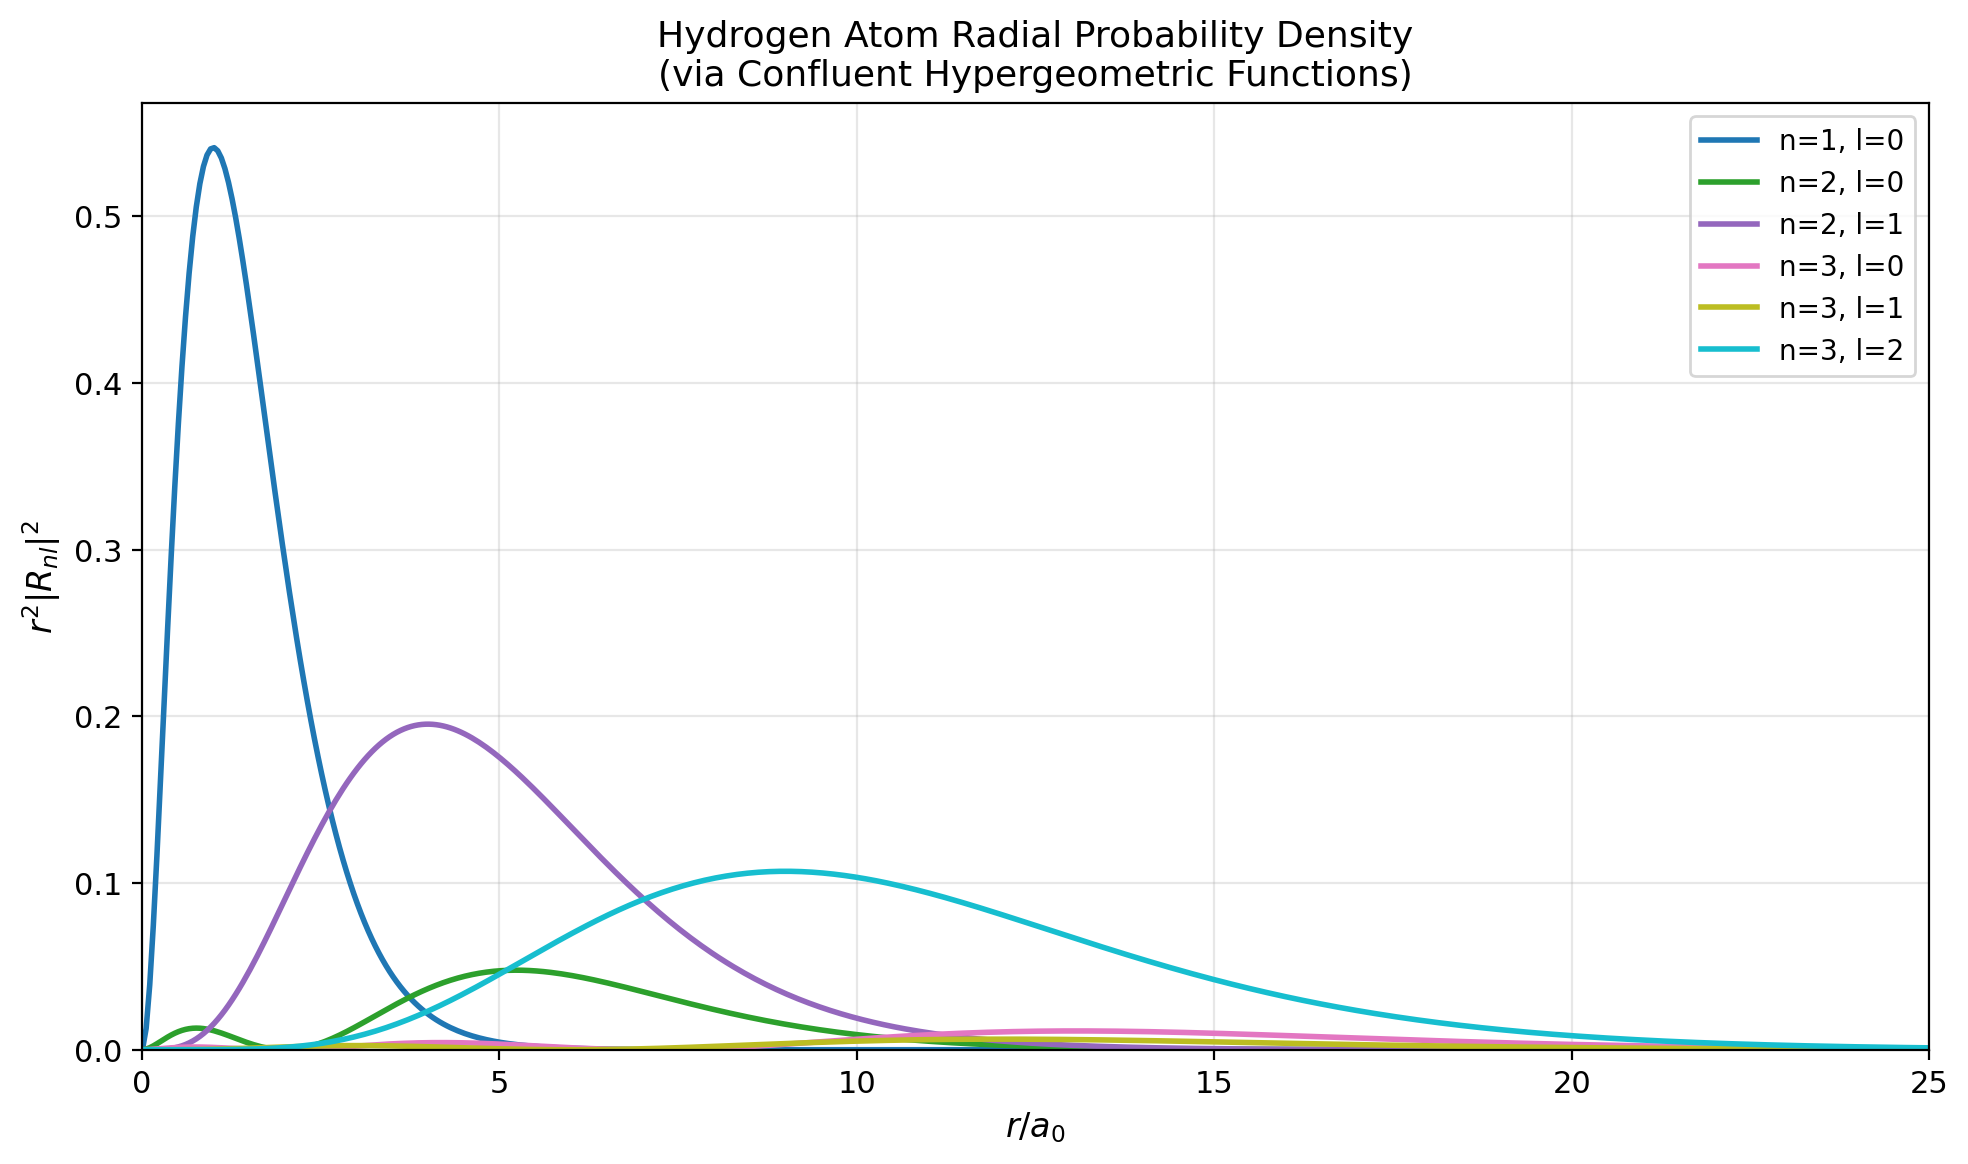


Final plot saved to 'plot.png'


In [8]:
# Application: Hydrogen atom radial wavefunctions
def hydrogen_radial(n, l, r, a0=1):
    """
    Compute the radial wavefunction R_nl(r) for hydrogen atom.
    
    Parameters
    ----------
    n : int
        Principal quantum number (n >= 1)
    l : int
        Angular momentum quantum number (0 <= l < n)
    r : float or array
        Radial coordinate
    a0 : float
        Bohr radius (default 1 for atomic units)
        
    Returns
    -------
    R : array
        Radial wavefunction values
    """
    r = np.asarray(r)
    rho = 2 * r / (n * a0)
    
    # Normalization constant
    from scipy.special import factorial
    norm = np.sqrt((2/(n*a0))**3 * factorial(n-l-1) / (2*n*factorial(n+l)))
    
    # Confluent hypergeometric function 1F1
    # Using scipy's implementation
    hyp1f1_vals = np.array([special.hyp1f1(-n+l+1, 2*l+2, rhoi) for rhoi in rho])
    
    R = norm * np.exp(-rho/2) * rho**l * hyp1f1_vals
    return R


# Plot hydrogen wavefunctions
fig, ax = plt.subplots(figsize=(10, 6))

r = np.linspace(0.01, 25, 500)
a0 = 1  # Atomic units

# Plot several (n, l) states
states = [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2)]
colors = plt.cm.tab10(np.linspace(0, 1, len(states)))

for (n, l), color in zip(states, colors):
    R = hydrogen_radial(n, l, r, a0)
    # Plot probability density r²|R|²
    ax.plot(r, r**2 * R**2, label=f'n={n}, l={l}', color=color, linewidth=2)

ax.set_xlabel(r'$r/a_0$')
ax.set_ylabel(r'$r^2|R_{nl}|^2$')
ax.set_title('Hydrogen Atom Radial Probability Density\n(via Confluent Hypergeometric Functions)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 25)
ax.set_ylim(0, None)

plt.tight_layout()
plt.savefig('hypergeometric_functions_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFinal plot saved to 'plot.png'")

## Summary

In this notebook, we have explored:

1. **Definition and Properties**: The Gaussian hypergeometric function $_2F_1(a, b; c; z)$ and its generalization $_pF_q$

2. **Convergence**: Series convergence criteria and behavior near singular points

3. **Special Cases**: Connection to elementary functions (logarithm, binomial) and orthogonal polynomials (Legendre)

4. **Contiguous Relations**: The algebraic relations connecting hypergeometric functions with shifted parameters

5. **Transformation Formulas**: Euler's and Pfaff's transformations for analytic continuation

6. **Physical Applications**: The role of hypergeometric functions in quantum mechanics (hydrogen atom wavefunctions)

### Key Equations

- **Series definition**: $_2F_1(a, b; c; z) = \sum_{n=0}^{\infty} \frac{(a)_n (b)_n}{(c)_n} \frac{z^n}{n!}$

- **Differential equation**: $z(1-z)w'' + [c - (a+b+1)z]w' - ab\,w = 0$

- **Euler transformation**: $_2F_1(a, b; c; z) = (1-z)^{c-a-b} \, _2F_1(c-a, c-b; c; z)$

### Further Reading

- Abramowitz & Stegun, *Handbook of Mathematical Functions*, Chapter 15
- NIST Digital Library of Mathematical Functions, Chapter 15
- Andrews, Askey, Roy, *Special Functions*